In [13]:
#importando pandas e matplotlib 
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#incluindo o caminho do arquivo
path_arq = "/home/malu/time-series-analysis/jena_climate_2009_2016.csv"

data = pd.read_csv(path_arq, parse_dates=['Date Time'], index_col='Date Time')


In [15]:
data

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2


In [36]:
#correlação entre duas variaveis
correlation = data['Tdew (degC)'].corr(data['T (degC)'])
print("correlação entre Temperatura do ponto de orvalho e temperatura: ", correlation)


correlação entre Temperatura do ponto de orvalho e temperatura:  0.8957080926670664


In [45]:
#calcular a variação percentual entre valores consecutivos em uma série de dados
# retorna a variação percentual entre o valor atual e o valor anterior na série original.

changes = data.pct_change()

In [47]:
#retorna a correlação da alteração percentual entre as variáveis
correlation2 = changes['Tdew (degC)'].corr(changes['T (degC)'])
print("Correlation of changes: ", correlation2)

Correlation of changes:  nan


<Axes: xlabel='Date Time'>

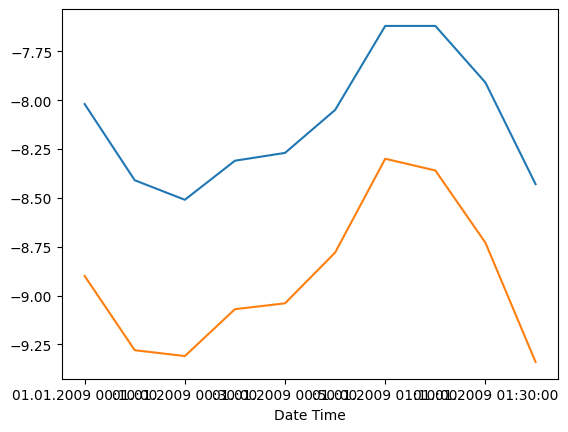

In [48]:
data['T (degC)'][:10].plot()
data['Tdew (degC)'][:10].plot()

In [51]:
#importando a statsmodels, biblioteca de estatistica
import statsmodels.api as sm

data = data.dropna()
temp = data['T (degC)']
tempDew = data['Tdew (degC)']

correlation = temp.corr(tempDew)
#%4.2f formata um número de ponto flutuante com no mínimo 4 caracteres, sendo 2 deles após o ponto decimal
print("The correlation between temperatura and temperatura de ponto de orvalho is %4.2f" %(correlation))

The correlation between temperatura and temperatura de ponto de orvalho is 0.90


In [53]:
#cria um novo dataframe 
dfx  = pd.DataFrame(temp.values, columns=['Temperatura'])
dfx

,Temperatura
0,-8.02
1,-8.41
2,-8.51
3,-8.31
4,-8.27
...,...
420546,-4.05
420547,-3.35
420548,-3.16
420549,-4.23


In [55]:
dfx1 = sm.add_constant(dfx)
dfx1


,const,Temperatura
0,1.0,-8.02
1,1.0,-8.41
2,1.0,-8.51
3,1.0,-8.31
4,1.0,-8.27
...,...,...
420546,1.0,-4.05
420547,1.0,-3.35
420548,1.0,-3.16
420549,1.0,-4.23


In [57]:
#tempDew é a vraiavel dependente, e dfx1 variavel independente 
result = sm.OLS(tempDew.values, dfx1).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.707e+06
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:44:21   Log-Likelihood:            -1.0577e+06
No. Observations:              420551   AIC:                         2.115e+06
Df Residuals:                  420549   BIC:                         2.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.8077      0.007   -260.647      

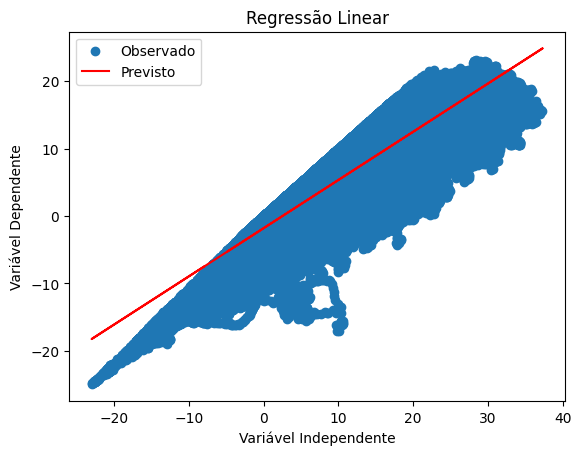

In [60]:
plt.scatter(dfx1.iloc[:, 1], tempDew.values, label='Observado')  # Plotar os dados observados
plt.plot(dfx1.iloc[:, 1], result.predict(), color='red', label='Previsto')  # Plotar a linha de regressão
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Regressão Linear')
plt.legend()
plt.show()